## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

## Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/ADBL_data.csv')
df['Date'] = pd.to_datetime(df.Date)
# df = df[df['Date'] >= '2015-01-01']
df.head()

,Date,Open,High,Low,Close
0,2012-01-01,115.0,115.0,113.0,114.0
1,2012-01-02,114.0,118.0,115.0,118.0
2,2012-01-03,118.0,116.0,114.0,115.0
3,2012-01-04,115.0,115.0,113.0,114.0
4,2012-01-05,114.0,114.0,112.0,113.0


## Time Series chart of ADBL

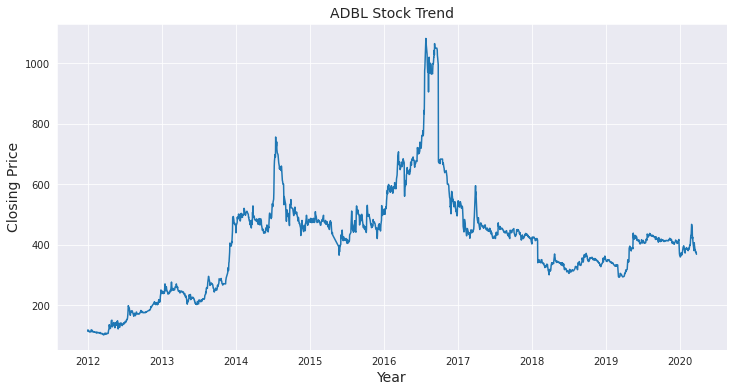

In [ ]:
plt.title('ADBL Stock Trend', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.plot(df['Date'], df['Close'])
plt.show()

##Generate Features from Closing price

In [ ]:
df = df[['Date','Close']]

In [ ]:
# Generate Simple moving averages over the period of 7, 15 and 30 days
for period in [7, 15, 30]:
    column = f'sma_{period}'
    df[column] = df[['Close']].rolling(period).mean()

In [ ]:
# Generate log returns
df['log_returns'] = np.log(df.Close.pct_change() + 1)

In [ ]:
df

,Date,Close,sma_7,sma_15,sma_30,log_returns
0,2012-01-01,114.0,NaN,NaN,NaN,NaN
1,2012-01-02,118.0,NaN,NaN,NaN,0.034486
2,2012-01-03,115.0,NaN,NaN,NaN,-0.025752
3,2012-01-04,114.0,NaN,NaN,NaN,-0.008734
4,2012-01-05,113.0,NaN,NaN,NaN,-0.008811
...,...,...,...,...,...,...
1906,2020-03-16,382.0,395.428571,418.866667,403.800000,0.000000
1907,2020-03-17,378.0,390.000000,415.333333,403.400000,-0.010526
1908,2020-03-18,374.0,385.571429,411.466667,402.933333,-0.010638
1909,2020-03-19,376.0,385.000000,407.533333,402.600000,0.005333


In [ ]:
# Lag days of -1 is actually 1.
LAG_DAYS = -1

df['close_future'] = df['Close'].shift(LAG_DAYS)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Close,sma_7,sma_15,sma_30,log_returns,close_future
0,2012-02-14,109.0,109.428571,110.533333,112.300000,0.009217,111.0
1,2012-02-15,111.0,109.428571,110.466667,112.200000,0.018182,108.0
2,2012-02-16,108.0,109.142857,110.066667,111.866667,-0.027399,109.0
3,2012-02-21,109.0,109.000000,109.866667,111.666667,0.009217,109.0
4,2012-02-23,109.0,109.000000,109.666667,111.500000,0.000000,107.0
...,...,...,...,...,...,...,...
1876,2020-03-15,382.0,401.571429,419.933333,403.866667,-0.038516,382.0
1877,2020-03-16,382.0,395.428571,418.866667,403.800000,0.000000,378.0
1878,2020-03-17,378.0,390.000000,415.333333,403.400000,-0.010526,374.0
1879,2020-03-18,374.0,385.571429,411.466667,402.933333,-0.010638,376.0


In [ ]:
X = df[['Close', 'sma_7', 'sma_15', 'sma_30', 'log_returns']]
y = df[['close_future']]

In [ ]:
# Split Train and Test set into 70/30 percent
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

## Scaling Train and Test Data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
# Train the model on the training set
model = LinearRegression().fit(X_train, Y_train)

In [ ]:
# Linear model coefficients(Open, High, Low) and Intercept
print('LR Coefficients: \n', model.coef_)
print('LR Intercept: \n', model.intercept_)

LR Coefficients: 
 [[212.97538838  -4.05199217  -1.7792257    3.26349589   1.36966548]]
LR Intercept: 
 [575.15329341]


## Model Evaluation

In [ ]:
#  coefficient of determination (R²)
#  Its maximum is 1. The higher the R² value, the better the fit.
print("Performance on training set (R²): ", model.score(X_train, Y_train))
print("Performance on test set (R²): ", model.score(X_test, Y_test))

Performance on training set (R²):  0.9923030733225079
Performance on test set (R²):  0.9655031427974509


## Stock Prediction

In [ ]:
yhat_test = model.predict(X_test)

In [ ]:
print('Test Actual:', Y_test[:6].values)
print('Test Predicted:', yhat_test[:6])

Test Actual: [[425.]
 [422.]
 [427.]
 [428.]
 [427.]
 [431.]]
Test Predicted: [[420.37393754]
 [424.82996442]
 [421.17596259]
 [427.27230596]
 [427.88222716]
 [426.70586731]]


In [ ]:
# The mean squared error
print("Root mean squared error: %.2f"
      % mean_squared_error(Y_test, yhat_test, squared=False))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, yhat_test))

Root mean squared error: 9.40
Variance score: 0.97


In [ ]:
# Preparing predicted data for plotting
date_train = df['Date'][LAG_DAYS:len(Y_train) + LAG_DAYS]
date_test = df['Date'][-len(Y_test):]

## Prediction Visualization

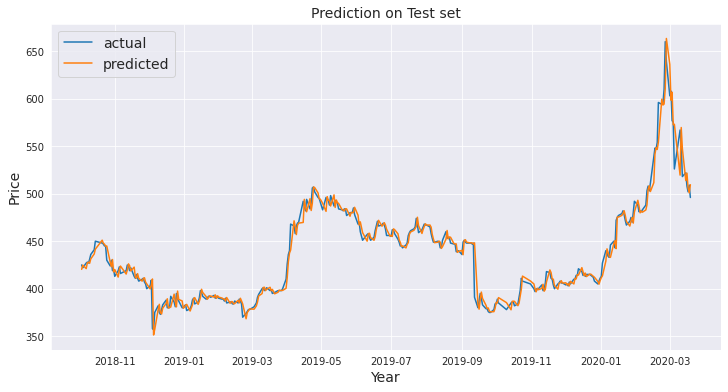

In [ ]:
plt.title('Prediction on Test set', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.plot(date_test, Y_test, label='actual')
plt.plot(date_test, yhat_test, label='predicted')
plt.legend(fontsize=14)
plt.show()